In [ ]:
#Data from some random-chosen cities was collected through OpenWeatherMaps 
#and plotted into four graphs of selected data, and against latitude values in a scatterplot. 

#Concerning latitude and temprThe graph shows a bell-curve shape 
#in which the closer to latitude 0, a higher temperature occurs. 
#However, the data collected represents a particular day/month: April. 
#So it is feasible the curve goes up or down depending the season and hemisphere 
#(south or north). If date were collected over a year or more, 
#it could be revealed more credible trends and even detect whether or not global 
#warming has changed the historical patterns. Regarding humidity, cloudiness and 
#wind speed, the graphs are not conclusive because of the time-frame and amount of data. 
#Overall, it seems that they are not affected by the latitude, because they might depend 
#on a wide range of variables other than latitude, such as hydrography or/and orography.  


In [213]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import datetime
import time
import requests
import seaborn as sns
from citipy import citipy

In [15]:
now = datetime.datetime.now()
today = now.strftime("%m/%d/%Y")

In [17]:
apikey = "ae9c78832fc84a8a2b6cae48f9bbb580"

In [18]:
sns.set()
doc = "weather_cities.csv"

In [22]:
lat_range = (-90, 90)
lng_range = (-180, 180)

In [23]:
#Generate Cities List

In [30]:
lat_lngs = []
cities = []

In [39]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [43]:
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

In [44]:
len(cities)

597

In [46]:
lat_lngs = []
cities = []
duplicate_cities= []
coords = []
lats = []
lngs = []
countries = []
no_dup_lats = []
no_dup_lngs = []

In [47]:
size = 1500 

In [51]:
lats = np.random.uniform(low=-90.000, high=90.000, size=size)
lngs = np.random.uniform(low=-180.000, high=180.000, size=size)
lat_lngs = zip(lats, lngs)

In [53]:
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
        
    if city not in cities:        
        cities.append(city) 
        coords.append(lat_lng) 
        countries.append(country)
        no_dup_lats.append(lat_lng[0])
        no_dup_lngs.append(lat_lng[1])
    else:
        duplicate_cities.append(city)

In [55]:
columns = ["City","Coords","Nubosidad","Country","Date","Humidity","Lat","Lng","Max_Temp","Wind_Speed"]
cities_df = pd.DataFrame(columns=columns)

In [57]:
cities_df['City'] = cities 
cities_df['Coords'] = coords 
cities_df['Country'] = countries 
cities_df['Lat'] = no_dup_lats 
cities_df['Lng'] = no_dup_lngs

In [58]:
#API Calls

In [62]:
url = "http://api.openweathermap.org/data/2.5/weather?" 
units = "imperial"

In [63]:
for index, row in cities_df.iterrows():   
    try:
        
        df_city = row['City']
        df_country = row['Country']
        
        query_url = url + "appid=" + apikey + "&units=" + units + "&q=" + df_city +"," + df_country
        response = requests.get(query_url).json()
        
        print(f"Processing city record {index} | ",df_city,", ",df_country)
        print(query_url)
        
        time.sleep(1) 
         
        df_cloud = response["clouds"]["all"]
        df_date = response["dt"]
        df_humidity = response["main"]["humidity"]
        df_maxtemp = response["main"]["temp_max"]
        df_wind = response["wind"]["speed"]
       
        df_lat = "{:0.2f}".format(response["coord"]["lat"]) 
        df_lng = "{:0.2f}".format(response["coord"]["lon"])
  
        cities_df.at[index,"Nubosidad"] = df_cloud
        cities_df.at[index,"Date"] = df_date
        cities_df.at[index,"Humidity"] = df_humidity
        cities_df.at[index,"Lat"] = df_lat
        cities_df.at[index,"Lng"] = df_lng
        cities_df.at[index, "Max_Temp"] = df_maxtemp
        cities_df.at[index, "Wind_Speed"] = df_wind
                
    except:
        print(f"Invalid city/country, {df_city} / {df_country}, skipping... ")

Processing city record 0 |  nizhneyansk ,  ru
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=nizhneyansk,ru
Invalid city/country, nizhneyansk / ru, skipping... 
Processing city record 1 |  hirna ,  et
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=hirna,et
Processing city record 2 |  leh ,  in
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=leh,in
Processing city record 3 |  taolanaro ,  mg
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=taolanaro,mg
Invalid city/country, taolanaro / mg, skipping... 
Processing city record 4 |  rio gallegos ,  ar
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=rio gallegos,ar
Processing city record 5 |  coquimbo ,  cl
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832f

Processing city record 50 |  harwich ,  us
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=harwich,us
Processing city record 51 |  bluff ,  nz
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=bluff,nz
Processing city record 52 |  tsihombe ,  mg
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=tsihombe,mg
Invalid city/country, tsihombe / mg, skipping... 
Processing city record 53 |  new norfolk ,  au
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=new norfolk,au
Processing city record 54 |  vila franca do campo ,  pt
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=vila franca do campo,pt
Processing city record 55 |  ksenyevka ,  ru
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&un

Processing city record 101 |  kapaa ,  us
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=kapaa,us
Processing city record 102 |  san cristobal ,  ec
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=san cristobal,ec
Processing city record 103 |  mattru ,  sl
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=mattru,sl
Processing city record 104 |  arraial do cabo ,  br
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=arraial do cabo,br
Processing city record 105 |  murgab ,  tm
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=murgab,tm
Processing city record 106 |  tabiauea ,  ki
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=tabiauea,ki
Invalid city/country, tabiauea

Processing city record 150 |  punta arenas ,  cl
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=punta arenas,cl
Processing city record 151 |  port elizabeth ,  za
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=port elizabeth,za
Processing city record 152 |  savannah bight ,  hn
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=savannah bight,hn
Processing city record 153 |  ionia ,  us
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=ionia,us
Processing city record 154 |  perico ,  cu
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=perico,cu
Processing city record 155 |  tawkar ,  sd
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=tawkar,sd
Invalid city/country, 

Processing city record 199 |  tuktoyaktuk ,  ca
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=tuktoyaktuk,ca
Processing city record 200 |  bubaque ,  gw
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=bubaque,gw
Processing city record 201 |  bambous virieux ,  mu
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=bambous virieux,mu
Processing city record 202 |  tilichiki ,  ru
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=tilichiki,ru
Processing city record 203 |  ambulu ,  id
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=ambulu,id
Processing city record 204 |  dickinson ,  us
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=dickinson,us
Processing city record

Processing city record 250 |  biryusinsk ,  ru
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=biryusinsk,ru
Processing city record 251 |  grand river south east ,  mu
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=grand river south east,mu
Invalid city/country, grand river south east / mu, skipping... 
Processing city record 252 |  caluquembe ,  ao
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=caluquembe,ao
Processing city record 253 |  jalingo ,  ng
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=jalingo,ng
Processing city record 254 |  ostrovnoy ,  ru
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=ostrovnoy,ru
Processing city record 255 |  iqaluit ,  ca
http://api.openweathermap.org/data/2.5/weather?appid=ae9

Processing city record 300 |  bonavista ,  ca
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=bonavista,ca
Processing city record 301 |  biak ,  id
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=biak,id
Processing city record 302 |  faya ,  td
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=faya,td
Invalid city/country, faya / td, skipping... 
Processing city record 303 |  panjwin ,  iq
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=panjwin,iq
Invalid city/country, panjwin / iq, skipping... 
Processing city record 304 |  genhe ,  cn
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=genhe,cn
Processing city record 305 |  vila velha ,  br
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9b

Processing city record 349 |  itarema ,  br
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=itarema,br
Processing city record 350 |  balsas ,  br
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=balsas,br
Processing city record 351 |  belaya gora ,  ru
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=belaya gora,ru
Processing city record 352 |  sur ,  om
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=sur,om
Processing city record 353 |  stornoway ,  gb
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=stornoway,gb
Processing city record 354 |  molina ,  cl
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=molina,cl
Processing city record 355 |  lubben ,  de
http://ap

Processing city record 400 |  dunedin ,  nz
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=dunedin,nz
Processing city record 401 |  verkhnevilyuysk ,  ru
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=verkhnevilyuysk,ru
Processing city record 402 |  acapulco ,  mx
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=acapulco,mx
Processing city record 403 |  katsuura ,  jp
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=katsuura,jp
Processing city record 404 |  samalaeulu ,  ws
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=samalaeulu,ws
Invalid city/country, samalaeulu / ws, skipping... 
Processing city record 405 |  opuwo ,  na
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&unit

Invalid city/country, jiaojiang / cn, skipping... 
Processing city record 449 |  comodoro rivadavia ,  ar
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=comodoro rivadavia,ar
Processing city record 450 |  roald ,  no
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=roald,no
Processing city record 451 |  astoria ,  us
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=astoria,us
Processing city record 452 |  broken hill ,  au
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=broken hill,au
Processing city record 453 |  haapiti ,  pf
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=haapiti,pf
Processing city record 454 |  shenjiamen ,  cn
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&

Processing city record 498 |  cheuskiny ,  ru
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=cheuskiny,ru
Invalid city/country, cheuskiny / ru, skipping... 
Processing city record 499 |  kabwe ,  zm
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=kabwe,zm
Processing city record 500 |  ilulissat ,  gl
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=ilulissat,gl
Processing city record 501 |  tazovskiy ,  ru
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=tazovskiy,ru
Processing city record 502 |  tonj ,  sd
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=tonj,sd
Invalid city/country, tonj / sd, skipping... 
Processing city record 503 |  talcahuano ,  cl
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc

Processing city record 547 |  jurm ,  af
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=jurm,af
Processing city record 548 |  beringovskiy ,  ru
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=beringovskiy,ru
Processing city record 549 |  sao filipe ,  cv
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=sao filipe,cv
Processing city record 550 |  petropavlovsk-kamchatskiy ,  ru
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=petropavlovsk-kamchatskiy,ru
Processing city record 551 |  butembo ,  cd
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=butembo,cd
Processing city record 552 |  kuytun ,  cn
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=kuytun,cn
Invalid 

Processing city record 597 |  jambi ,  id
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=jambi,id
Processing city record 598 |  berlevag ,  no
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=berlevag,no
Processing city record 599 |  pastavy ,  by
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=pastavy,by
Processing city record 600 |  bolungarvik ,  is
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=bolungarvik,is
Invalid city/country, bolungarvik / is, skipping... 
Processing city record 601 |  sulangan ,  ph
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=sulangan,ph
Processing city record 602 |  lima ,  pe
http://api.openweathermap.org/data/2.5/weather?appid=ae9c78832fc84a8a2b6cae48f9bbb580&units=imperial&q=lima,

In [64]:
cities_df.to_csv(doc)
cities_df.head()

,City,Coords,Nubosidad,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,nizhneyansk,"(83.15241763895611, 134.6881856550885)",NaN,ru,NaN,NaN,83.152418,134.688186,NaN,NaN
1,hirna,"(9.48076376705174, 40.97863048843425)",76,et,1554231346,34,9.220000,41.100000,73.7,4.94
2,leh,"(36.21070296185361, 77.85764130888663)",32,in,1554231347,54,34.160000,77.580000,-7.12,1.59
3,taolanaro,"(-44.26082806431061, 54.21241510243877)",NaN,mg,NaN,NaN,-44.260828,54.212415,NaN,NaN
4,rio gallegos,"(-50.29385322462849, -70.86424750041058)",40,ar,1554228000,51,-51.620000,-69.220000,60.8,26.4


In [65]:
#Temperatura / Latitud

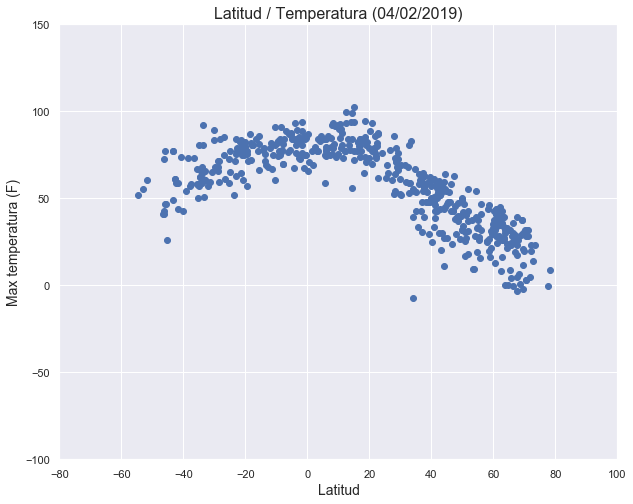

In [126]:
plt.figure(figsize=(10,8))
plt.xlim(-80, 100)
plt.ylim(-100, 150)
plt.xlabel("Latitud", fontsize=14)
plt.ylabel("Max temperatura (F)", fontsize=14)
title = "Latitud / Temperatura ({})".format(today)
plt.title(title, fontsize=16)
plt.scatter(pd.to_numeric(cities_df["Lat"]), pd.to_numeric(cities_df["Max_Temp"]))

plt.savefig("Temperatura.png")
plt.show()

In [ ]:
#Humedad / Latitud

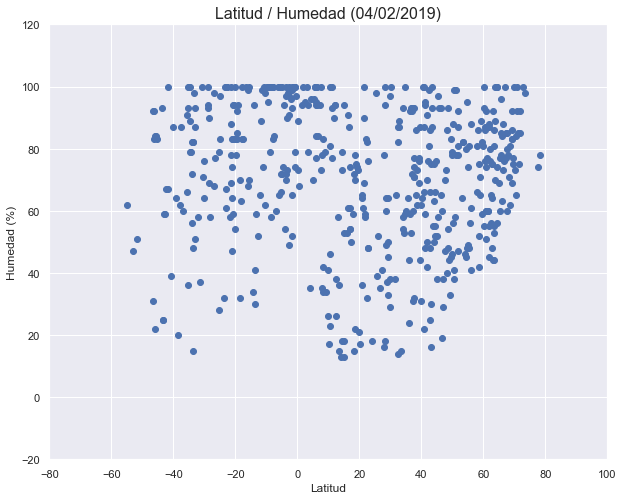

In [153]:
plt.figure(figsize=(10,8))
plt.xlim(-80, 100)
plt.ylim(-20, 120)
plt.xlabel("Latitud", fontsize=12)
plt.ylabel("Humedad (%)", fontsize=12)
title = "Latitud / Humedad ({})".format(today)
plt.title(title, fontsize=16)
plt.scatter(pd.to_numeric(cities_df["Lat"]), pd.to_numeric(cities_df["Humidity"]))

plt.savefig("Humedad.png")
plt.show()

In [156]:
#Nubosidad / latitud

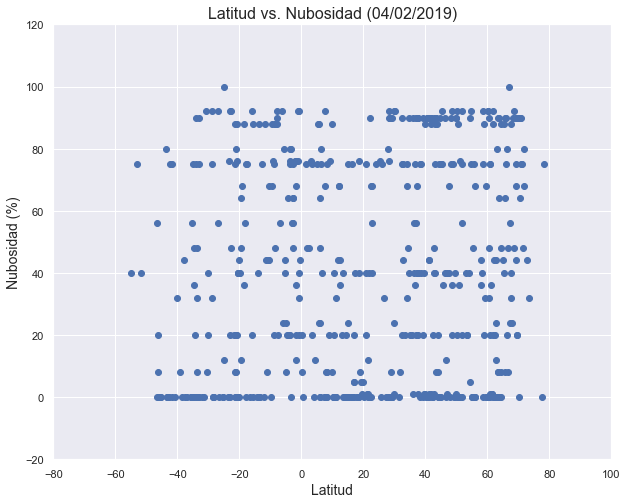

In [179]:
# Latitude vs. Cloudiness Plot
plt.figure(figsize=(10,8))
plt.xlim(-80, 100)
plt.ylim(-20, 120)
plt.xlabel("Latitud", fontsize=14)
plt.ylabel("Nubosidad (%)", fontsize=14)
title = "Latitud vs. Nubosidad ({})".format(today)

plt.title(title, fontsize=16)
plt.scatter(pd.to_numeric(cities_df["Lat"]), pd.to_numeric(cities_df["Nubosidad"]))

plt.savefig("Nubosidad.png")
plt.show()

In [181]:
#Viento / Latitud

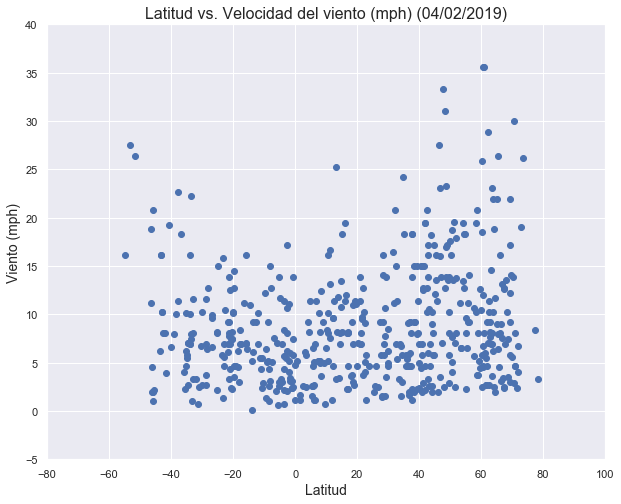

In [212]:
plt.figure(figsize=(10,8))
plt.xlim(-80, 100)
plt.ylim(-5, 40)
plt.xlabel("Latitud", fontsize=14)
plt.ylabel("Viento (mph)", fontsize=14)

title = "Latitud vs. Velocidad del viento (mph) ({})".format(today)
plt.title(title, fontsize=16)
plt.scatter(pd.to_numeric(cities_df["Lat"]), pd.to_numeric(cities_df["Wind_Speed"]))

plt.savefig("Viento.png")
plt.show()